# **Heart Disease Analysis (EDA)**

In [1]:
# Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preface
We will try to analyse heart disease based on the given data set.
In the data set, the factors that may contribute to the heart disease
includes habits, physical attributes and several other health conditions.
We will try to figure out the possible factors that lead to
heart disease.

# Data Set Up

In [2]:
data_src = "heart_data/heart_2020_cleaned.csv"
data_df = pd.read_csv(data_src)

In [3]:
# Data Overview
print("The first 10 rows of the data:")
data_df.head(10)

The first 10 rows of the data:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [4]:
# The shape of the data
print(f"The data set consists of {data_df.shape[0]} rows and {data_df.shape[1]} columns.")

The data set consists of 319795 rows and 18 columns.


In [5]:
# Missing Values Check
print("The existence of missing values in each column:")
data_df.isnull().any()

The existence of missing values in each column:


HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [6]:
# Info of the data
print("General information about the data:")
data_df.info()

General information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-nul

In [7]:
# Number of unique values in each column
print("The number of unique values in each column:")
data_df.nunique()

The number of unique values in each column:


HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

# Analytics of the Data
Now we want to have a closer look at the data to gain a deeper insight.
We will present the visualisation of the relation of each column with column
`HeartDisease` with the hope that we can draw conclusions about the factors
that contribute to heart disease as the data should tell.

In [8]:
# Visualisation Class
class VizData:
    def __init__(self, df, ccol, ft_1, ft_2):
        if type(df) == pd.core.frame.DataFrame \
            and ccol in df.columns \
            and type(ft_1) == type(ft_2) == str:
            self.df = df
            self.ft1 = ft_1
            self.ft2 = ft_2
            self.ccol = ccol
        
    # Visualisation for columns with binary values
    def binviz(self, col, idx,
                  heat_title,
                  don_all_labels, don_all_title= "Main Pie Chart",
                  don_one_title= "Pie Chart 1",
                  don_two_title= "Pie Chart 2",
                  fig_size= (8, 6),
                  binv= ["No", "Yes"]):
        if col in self.df.columns \
                and self.df[col].nunique() == 2 \
                and isinstance(idx, list) \
                and len(idx) == 2 \
                and isinstance(fig_size, tuple) \
                and len(fig_size) == 2 \
                and all(isinstance(k, int) and k > 0 for k in fig_size) \
                and isinstance(don_all_labels, list) \
                and all(isinstance(lab, str) for lab in don_all_labels) \
                and len(don_all_labels) == 4 \
                and all(isinstance(tit, str)
                        for tit in [heat_title,
                                    don_all_title,
                                    don_one_title,
                                    don_two_title]
                       ):
            m_row, n_col = 2, 2
            fig = plt.figure(figsize= (n_col * fig_size[0], m_row * fig_size[1]))
            gs = fig.add_gridspec(m_row, n_col)
            ax = [[fig.add_subplot(gs[i, j]) for j in range(n_col)]
                  for i in range(m_row)]
            sns.set_style("dark")
            
            # heatmap
            heat_df = pd.DataFrame(
                                    {self.ft1: [len(self.df[(self.df[self.ccol] == "Yes")
                                                            & (self.df[col] == binv[1])]),
                                                len(self.df[(self.df[self.ccol] == "Yes")
                                                            & (self.df[col] == binv[0])])
                                               ],
                                     self.ft2: [len(self.df[(self.df[self.ccol] == "No")
                                                            & (self.df[col] == binv[1])]),
                                                len(self.df[(self.df[self.ccol] == "No")
                                                            & (self.df[col] == binv[0])])
                                               ]
                                    }, index= idx)
            ax_00 = sns.heatmap(heat_df, linewidth= 0.1,
                                annot= True, fmt= "d",
                                cmap= "GnBu", ax= ax[0][0])
            ax_00.set_title(heat_title, pad= 12)
            
            # Donut Chart All
            don_all_list = [x for x in (list(heat_df[self.ft1]) + list(heat_df[self.ft2]))]
            ax_01 = ax[0][1]
            ax_01.pie(don_all_list, explode= (0.1, 0.1, 0, 0),
                      labels= don_all_labels,
                      autopct= "%1.1f%%",
                      colors= ["salmon", "pink", "lightblue", "turquoise"])
            ax_01.set(title= don_all_title)
            cir_01 = plt.Circle((0, 0), 0.35, fc= 'white')
            ax_01.add_patch(cir_01)
            
            # Donut Chart 1
            don_one_list = list(heat_df.T[idx[0]])
            ax_10 = ax[1][0]
            ax_10.pie(don_one_list, explode= (0.1, 0),
                      labels= [self.ft1, self.ft2],
                      autopct= "%1.1f%%",
                      colors= ["salmon", "turquoise"])
            ax_10.set(title= don_one_title)
            cir_10 = plt.Circle((0, 0), 0.35, fc= 'white')
            ax_10.add_patch(cir_10)
            
            # piechart 2
            don_two_list = list(heat_df[self.ft1])
            ax_11 = ax[1][1]
            ax_11.pie(don_two_list, explode= (0.1, 0),
                      labels= idx,
                      autopct= "%1.1f%%",
                      colors= ["salmon", "turquoise"])
            ax_11.set(title= don_two_title)
            cir_11 = plt.Circle((0, 0), 0.35, fc= 'white')
            ax_11.add_patch(cir_11)
            
            plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
            plt.show()
        
    # Visualisation for columns with numeric values
    def numviz(self, col, d1_labs, d2_labs, d1_div, d2_div,
               d1_colors, d2_colors,
               xlim_1, xlim_2,
               hist_binwidth= 5,
               h1_tit= "Histogram 1", h2_tit= "Histogram 2",
               d1_tit= "Donut Chart 1", d2_tit= "Donut Chart 2",
               fig_size= (8, 6)
              ):
        if col in self.df.columns \
                and self.df[col].dtype in [int, float] \
                and all(isinstance(labs, list)
                        and all(isinstance(l, str) for l in labs)
                        for labs in [d1_labs, d2_labs]) \
                and all(isinstance(div, list)
                        and all(isinstance(d, float) or isinstance(d, int)
                                for d in div)
                        for div in [d1_div, d2_div]
                       ) \
                and len(d1_labs) == len(d1_div) + 1 \
                and len(d2_labs) == len(d2_div) + 1 \
                and all(isinstance(xl, tuple) and all(isinstance(x, int)
                                                      for x in xl)
                        for xl in [xlim_1, xlim_2]) \
                and isinstance(hist_binwidth, int) and hist_binwidth > 0 \
                and all(isinstance(tit, str)
                        for tit in [h1_tit, h2_tit, d1_tit, d2_tit]
                       ):
            m_row, n_col = 2, 2
            fw, fd = fig_size
            fig= plt.figure(figsize= (n_col * fw, m_row * fd))
            gs = fig.add_gridspec(m_row, n_col)
            ax = [[fig.add_subplot(gs[i, j]) for j in range(n_col)]
                  for i in range(m_row)]
            sns.set_style("dark")
            
            # Histogram 1
            h1_data = self.df[(self.df[self.ccol] == "Yes")][col]
            ax_00 = sns.histplot(x= h1_data, binwidth= hist_binwidth, ax= ax[0][0])
            ax_00.set_title(h1_tit, pad= 12)
            ax_00.set(ylabel= "Count", xlim= xlim_1)
            
            # Donut Chart 1
            d1_divmod = [0] + d1_div + [self.df[(self.df[self.ccol] == "Yes")][col].max()]
            d1_data = [len(self.df[(self.df[self.ccol] == "Yes")
                                   & (d1_divmod[k] <= self.df[col])
                                      & (self.df[col] < d1_divmod[k + 1])]
                          )
                       for k in range(len(d1_divmod) - 2)] \
                       + [len(self.df[(self.df[self.ccol] == "Yes")
                                      & (self.df[col] >= d1_div[-1])])]
            ax_01 = ax[0][1]
            ax_01.pie(d1_data, labels= d1_labs, autopct= "%1.1f%%", colors= d1_colors)
            ax_01.set(title= d1_tit)
            cir_01 = plt.Circle((0, 0), 0.35, fc= "white")
            ax_01.add_patch(cir_01)
            
            # Histogram 2
            h2_data = self.df[(self.df[self.ccol] == "No")][col]
            ax_10 = sns.histplot(x= h2_data, binwidth= hist_binwidth, ax= ax[1][0])
            ax_10.set_title(h2_tit, pad= 12)
            ax_10.set(ylabel= "Count", xlim= xlim_2)
            
            # Donut 2
            d2_divmod = [0] + d2_div + [self.df[(self.df[self.ccol] == "No")][col].max()]
            d2_data = [len(self.df[(self.df[self.ccol] == "No")
                                   & ((d2_divmod[k] <= self.df[col])
                                      & (self.df[col] < d2_divmod[k + 1]))]
                          )
                       for k in range(len(d2_divmod) - 2)] \
                       + [len(self.df[(self.df[self.ccol] == "No")
                                      & (self.df[col] >= d2_div[-1])])]
            ax_11 = ax[1][1]
            ax_11.pie(d2_data, labels= d2_labs, autopct= "%1.1f%%", colors= d2_colors)
            ax_11.set(title= d2_tit)
            cir_11 = plt.Circle((0, 0), 0.35, fc= "white")
            ax_11.add_patch(cir_11)
            
            plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
            plt.show()

## A) BMI and Heart Disease Analysis

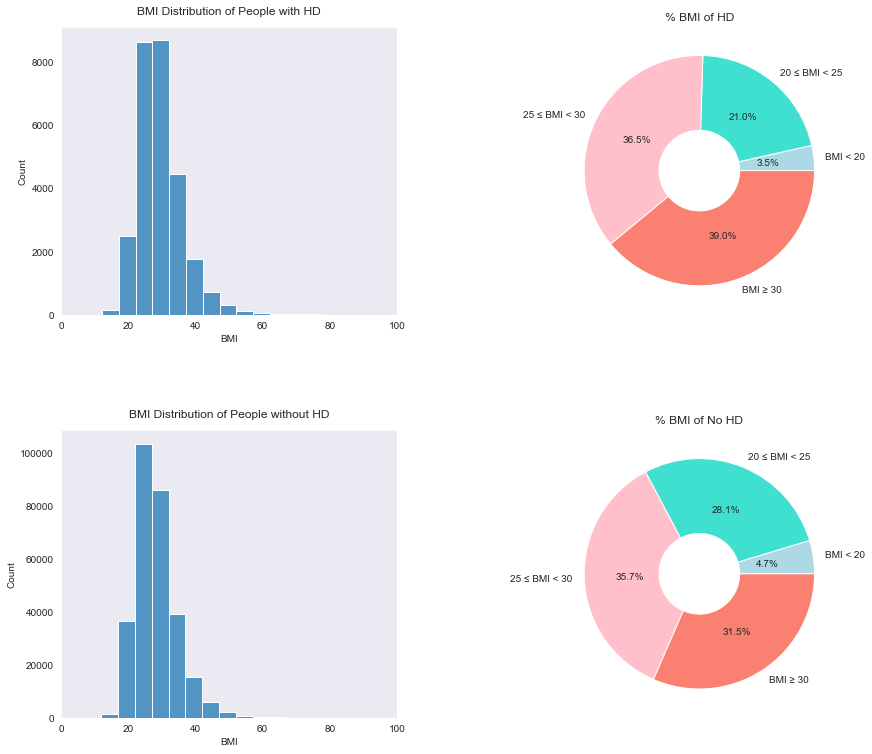

In [31]:
observ = VizData(data_df, "HeartDisease", "With Heart Disease", "Without Heart Disease")
bmi_labs = ["BMI < 20", "20 ≤ BMI < 25", "25 ≤ BMI < 30", "BMI ≥ 30"]
bmi_div = [20, 25, 30]
observ.numviz("BMI", bmi_labs, bmi_labs, bmi_div, bmi_div,
              ["lightblue", "turquoise", "pink", "salmon"],
              ["lightblue", "turquoise", "pink", "salmon"],
              (0, 100), (0, 100),
              h1_tit= "BMI Distribution of People with HD",
              h2_tit= "BMI Distribution of People without HD",
              d1_tit= "% BMI of HD",
              d2_tit= "% BMI of No HD"
             )

## B) Smoking and Heart Disease Analysis

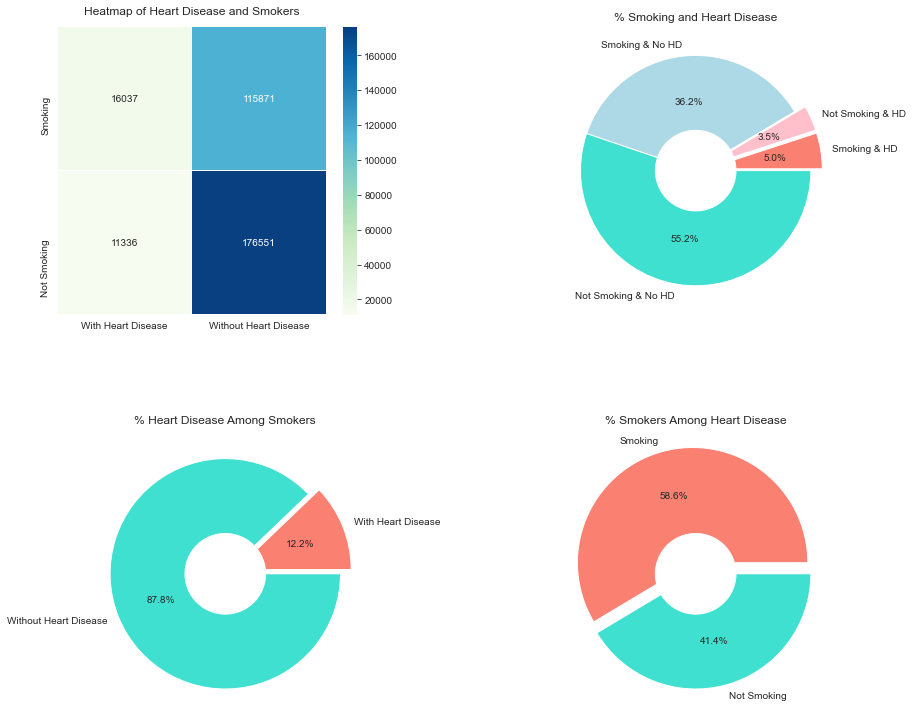

In [10]:
smoking_idx = ["Smoking", "Not Smoking"]
smoking_all_labs = ["Smoking & HD",
                    "Not Smoking & HD",
                    "Smoking & No HD",
                    "Not Smoking & No HD"]
observ.binviz("Smoking", smoking_idx,
              "Heatmap of Heart Disease and Smokers",
              smoking_all_labs,
              don_all_title= "% Smoking and Heart Disease",
              don_one_title= "% Heart Disease Among Smokers",
              don_two_title= "% Smokers Among Heart Disease")

## C) Alcohol Drinking and Heart Disease Analysis

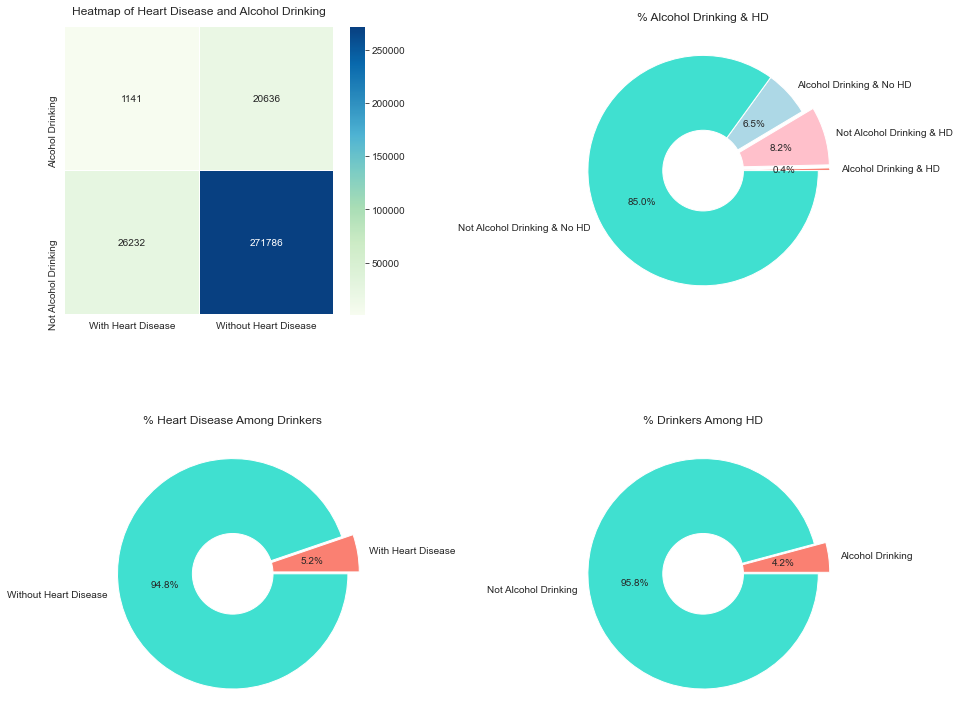

In [11]:
ad_idx= ["Alcohol Drinking", "Not Alcohol Drinking"]
ad_all_labs = ["Alcohol Drinking & HD",
               "Not Alcohol Drinking & HD",
               "Alcohol Drinking & No HD",
               "Not Alcohol Drinking & No HD"]
observ.binviz("AlcoholDrinking", ad_idx,
              "Heatmap of Heart Disease and Alcohol Drinking",
              ad_all_labs,
              don_all_title= "% Alcohol Drinking & HD",
              don_one_title= "% Heart Disease Among Drinkers",
              don_two_title= "% Drinkers Among HD")

## D) Stroke and Heart Disease Analysis

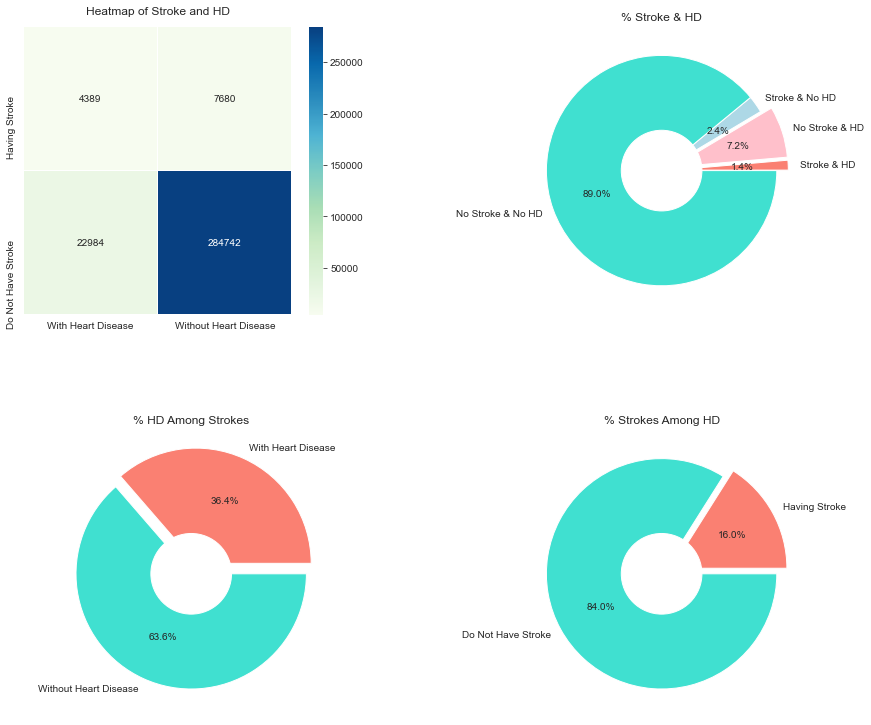

In [12]:
stroke_idx = ["Having Stroke", "Do Not Have Stroke"]
stroke_all_labs = ["Stroke & HD",
                   "No Stroke & HD",
                   "Stroke & No HD",
                   "No Stroke & No HD"]
observ.binviz("Stroke", stroke_idx,
              "Heatmap of Stroke and HD",
              stroke_all_labs,
              don_all_title= "% Stroke & HD",
              don_one_title= "% HD Among Strokes",
              don_two_title= "% Strokes Among HD")

## E) Physical Health Problems and Heart Disease Analysis

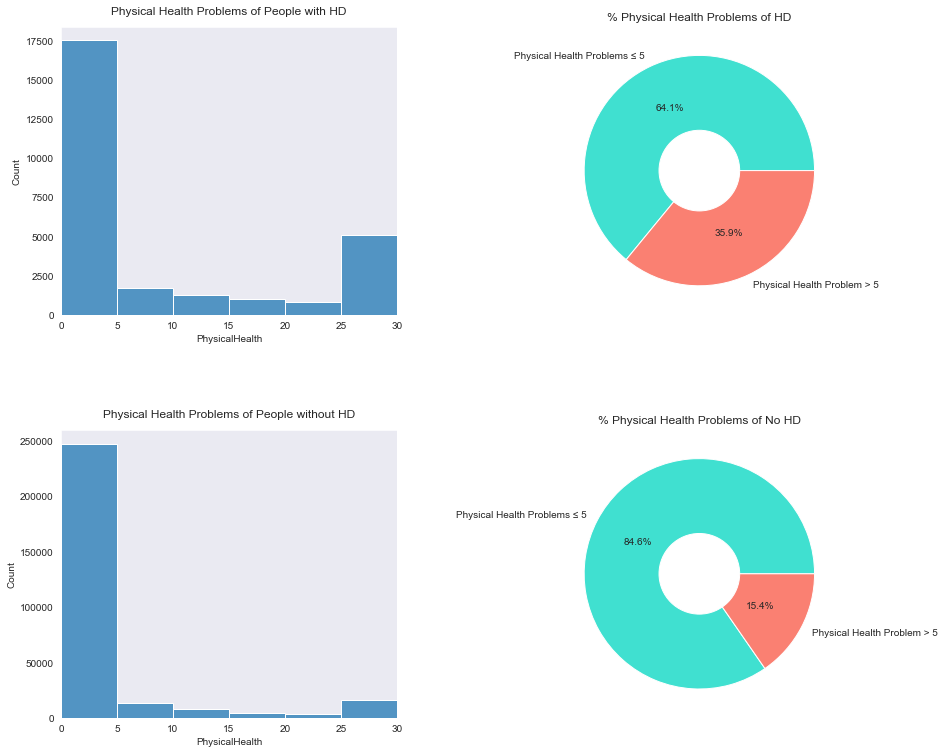

In [13]:
php_labs = ["Physical Health Problems ≤ 5", "Physical Health Problem > 5"]
php_div = [5]
observ.numviz("PhysicalHealth",
              php_labs, php_labs,
              php_div, php_div,
              ["turquoise", "salmon"],
              ["turquoise", "salmon"],
              (0, 30), (0, 30),
              h1_tit= "Physical Health Problems of People with HD",
              h2_tit= "Physical Health Problems of People without HD",
              d1_tit= "% Physical Health Problems of HD",
              d2_tit= "% Physical Health Problems of No HD")

## F) Mental Health Problem and Heart Disease Analysis

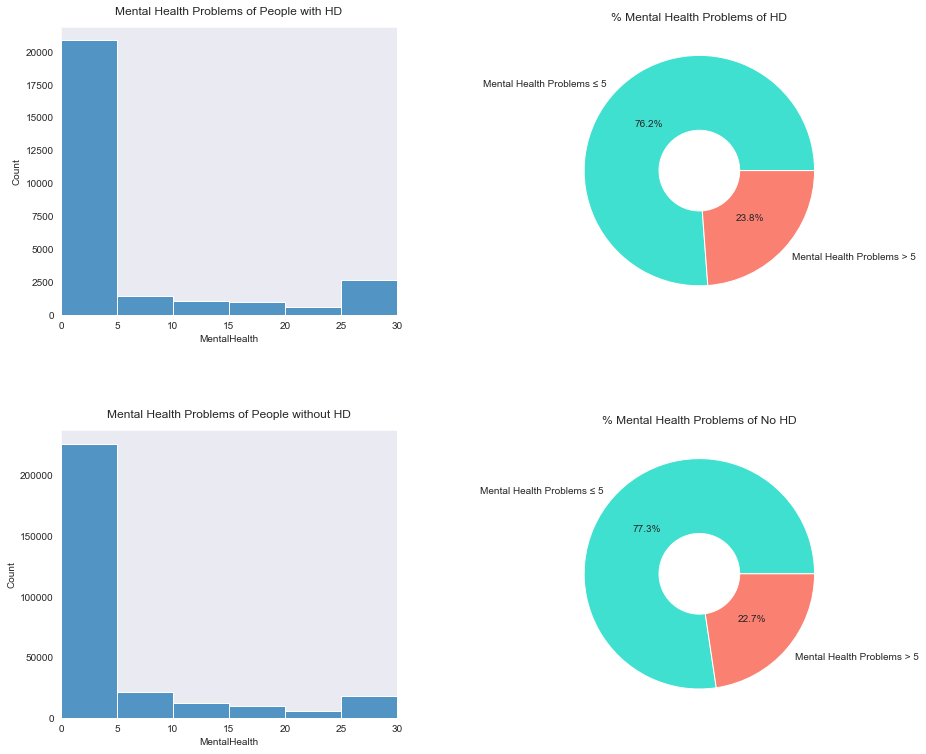

In [14]:
mhp_labs = ["Mental Health Problems ≤ 5", "Mental Health Problems > 5"]
mhp_div = [5]
observ.numviz("MentalHealth",
              mhp_labs, mhp_labs,
              mhp_div, mhp_div,
              ["turquoise", "salmon"],
              ["turquoise", "salmon"],
              (0, 30), (0, 30),
              h1_tit= "Mental Health Problems of People with HD",
              h2_tit= "Mental Health Problems of People without HD",
              d1_tit= "% Mental Health Problems of HD",
              d2_tit= "% Mental Health Problems of No HD")

## G) Difficulty Walking and Heart Disease Analysis

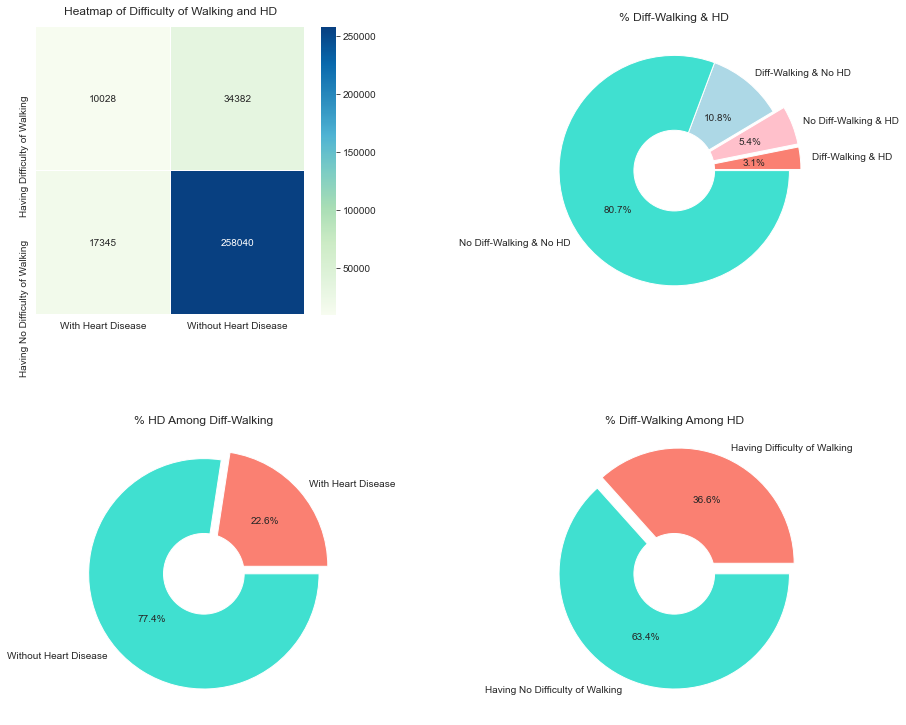

In [15]:
diffw_idx = ["Having Difficulty of Walking", "Having No Difficulty of Walking"]
diffw_all_labs = ["Diff-Walking & HD",
                  "No Diff-Walking & HD",
                  "Diff-Walking & No HD",
                  "No Diff-Walking & No HD"]
observ.binviz("DiffWalking", diffw_idx,
              "Heatmap of Difficulty of Walking and HD",
              diffw_all_labs,
              don_all_title= "% Diff-Walking & HD",
              don_one_title= "% HD Among Diff-Walking",
              don_two_title= "% Diff-Walking Among HD")

## H) Sex(Gender) and Heart Disease Analysis

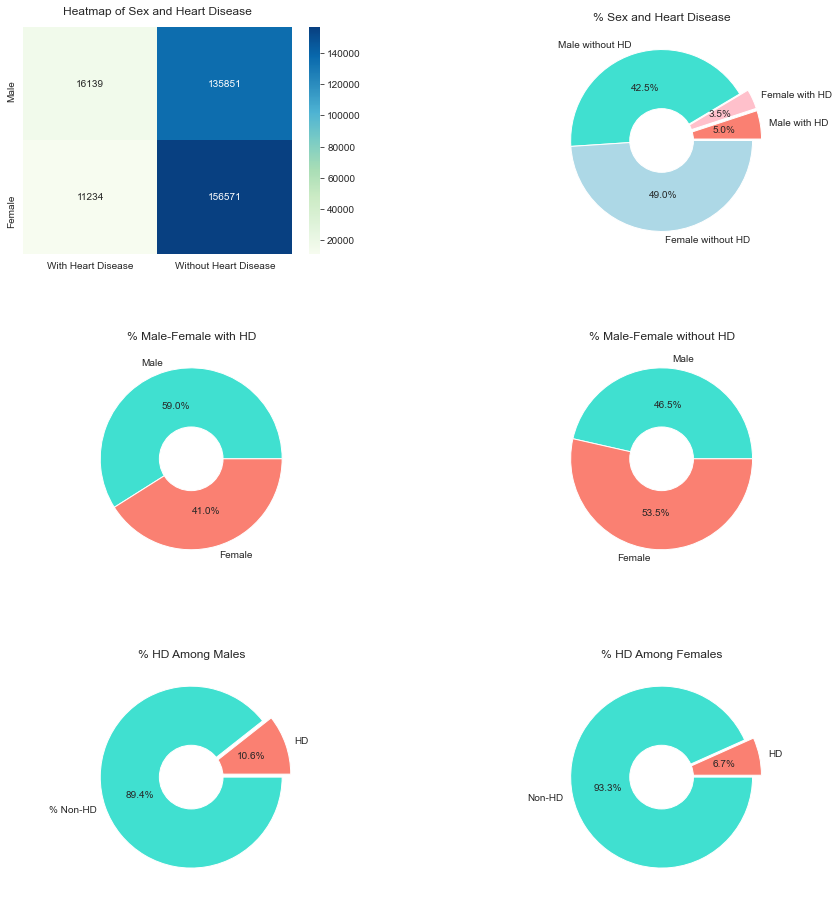

In [16]:
g_row, g_col = 3, 2
g_fig = plt.figure(figsize= (g_col * 8, g_row * 5))
g_gs = g_fig.add_gridspec(g_row, g_col)
g_ax = [[g_fig.add_subplot(g_gs[i, j]) for j in range(g_col)]
        for i in range(g_row)]
sns.set_style("dark")

# Heatmap of Sex and Heart Disease
sex_hd_data = [
    len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Male")]),
    len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Female")]),
    len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Male")]),
    len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Female")])
]
sex_hd_data = pd.DataFrame(
    {"With Heart Disease": [
        len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Male")]),
        len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Female")])],
     "Without Heart Disease": [
         len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Male")]),
         len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Female")])]
    },
    index= ["Male", "Female"])
gax_00 = sns.heatmap(data= sex_hd_data,
#                      linewidth= 0.1,
                     annot= True, fmt= "d",
                     cmap= "GnBu",
                     ax= g_ax[0][0])
gax_00.set_title("Heatmap of Sex and Heart Disease", pad= 12)

# Donut Chart All
don_all_data = list(sex_hd_data["With Heart Disease"].values) \
                + list(sex_hd_data["Without Heart Disease"].values)
gax_01 = g_ax[0][1]
gax_01.pie(don_all_data, explode= (0.1, 0.1, 0, 0),
           labels= ["Male with HD",
                    "Female with HD",
                    "Male without HD",
                    "Female without HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "pink", "turquoise", "lightblue"]
          )
gax_01.set_title("% Sex and Heart Disease")
cirg_01 = plt.Circle((0, 0), 0.35, fc= "white")
gax_01.add_patch(cirg_01)

# Donut Chart Male-Female % of HD Population
don_10_data = [len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Male")]),
               len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Female")])]
gax_10 = g_ax[1][0]
gax_10.pie(don_10_data,
           labels= ["Male", "Female"],
           autopct= "%1.1f%%",
           colors= ["turquoise", "salmon"])
gax_10.set_title("% Male-Female with HD")
cirg_10 = plt.Circle((0, 0), 0.35, fc= "white")
gax_10.add_patch(cirg_10)

# Donut Chart Male-Female % of No HD Population
don_11_data = [len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Male")]),
               len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Female")])]
gax_11 = g_ax[1][1]
gax_11.pie(don_11_data,
           labels= ["Male", "Female"],
           autopct= "%1.1f%%",
           colors= ["turquoise", "salmon"])
gax_11.set_title("% Male-Female without HD")
cirg_11 = plt.Circle((0, 0), 0.35, fc= "white")
gax_11.add_patch(cirg_11)

# Donut Chart of HD Among Males
don_20_data = [len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Male")]),
               len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Male")])]
gax_20 = g_ax[2][0]
gax_20.pie(don_20_data, explode= (0.1, 0),
           labels= ["HD", "% Non-HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
gax_20.set_title("% HD Among Males")
cirg_20 = plt.Circle((0, 0), 0.35, fc= "white")
gax_20.add_patch(cirg_20)

# Donut Chart of HD Among Females
don_21_data = [len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Female")]),
               len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Female")])]
gax_21 = g_ax[2][1]
gax_21.pie(don_21_data, explode= (0.1, 0),
           labels= ["HD", "Non-HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
gax_21.set_title("% HD Among Females")
cirg_21 = plt.Circle((0, 0), 0.35, fc= "white")
gax_21.add_patch(cirg_21)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## H) Age Category and Heart Disease Analysis

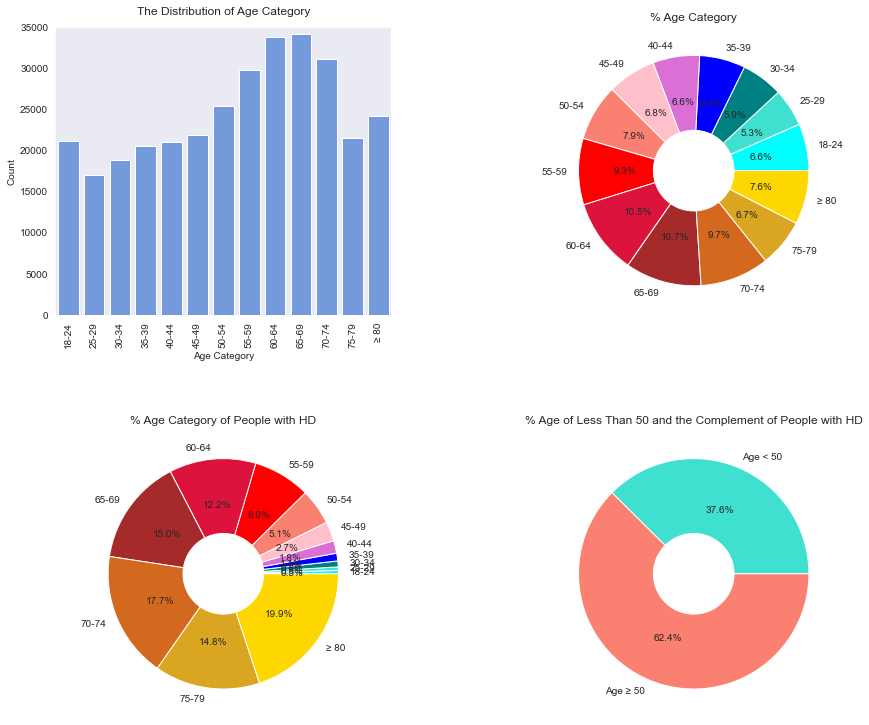

In [17]:
h_row, h_col = 2, 2
h_fig = plt.figure(figsize= (h_col *8, h_row *6))
h_gs = h_fig.add_gridspec(h_row, h_col)
h_ax = [[h_fig.add_subplot(h_gs[i, j]) for j in range(h_col)]
        for i in range(h_row)]

h_colors = ["aqua", "turquoise", "teal",
            "blue", "orchid", "pink",
            "salmon", "red", "crimson",
            "brown", "chocolate", "goldenrod",
            "gold"]
h_val_uniq = sorted(list(data_df["AgeCategory"].unique()))
h_labels = h_val_uniq[0: -1] + ["≥ 80"]

# Barplot
# bar_h_x = sorted(list(data_df["AgeCategory"].unique()))
bar_h_height = [list(data_df["AgeCategory"]).count(x) for x in h_val_uniq]
# bar_h_labels = bar_h_x[0:-1] + ["≥ 80"]
hax_00 = sns.barplot(x= h_val_uniq, y= bar_h_height, color= "cornflowerblue", ax= h_ax[0][0])
hax_00.set_title("The Distribution of Age Category", pad= 12)
hax_00.set(xlabel= "Age Category",
           ylabel= "Count", ylim= (0, 35000))
hax_00.set_xticklabels(h_labels, rotation= "vertical")

# Donut Chart of Age Category within the Whole Population
don_h01_data = bar_h_height
# don_h01_labels = bar_h_labels
hax_01 = h_ax[0][1]
hax_01.pie(don_h01_data,
           labels= h_labels,
           autopct= "%1.1f%%", colors= h_colors
           )
hax_01.set_title("% Age Category")
cirh_01 = plt.Circle((0, 0), 0.35, fc= "white")
hax_01.add_patch(cirh_01)

# Donut Chart of Age Category within People with HD
don_h10_data = [list(data_df[(data_df["HeartDisease"] == "Yes")]["AgeCategory"]).count(x)
                for x in h_val_uniq]
hax_10 = h_ax[1][0]
hax_10.pie(don_h10_data,
           labels= h_labels,
           autopct= "%1.1f%%",
           colors= h_colors)
hax_10.set_title("% Age Category of People with HD")
cirh_10 = plt.Circle((0, 0), 0.35, fc= "white")
hax_10.add_patch(cirh_10)

# Donut Chart of New Age Category within People without HD
don_h11_data = [sum(bar_h_height[0:6]), sum(bar_h_height[6:])]
hax_11 = h_ax[1][1]
hax_11.pie(don_h11_data,
           labels= ["Age < 50", "Age ≥ 50"],
           autopct= "%1.1f%%",
           colors= ["turquoise", "salmon"])
hax_11.set_title("% Age of Less Than 50 and the Complement of People with HD")
cirh_11 = plt.Circle((0, 0), 0.35, fc= "white")
hax_11.add_patch(cirh_11)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## I) Race and Heart Disease Analysis

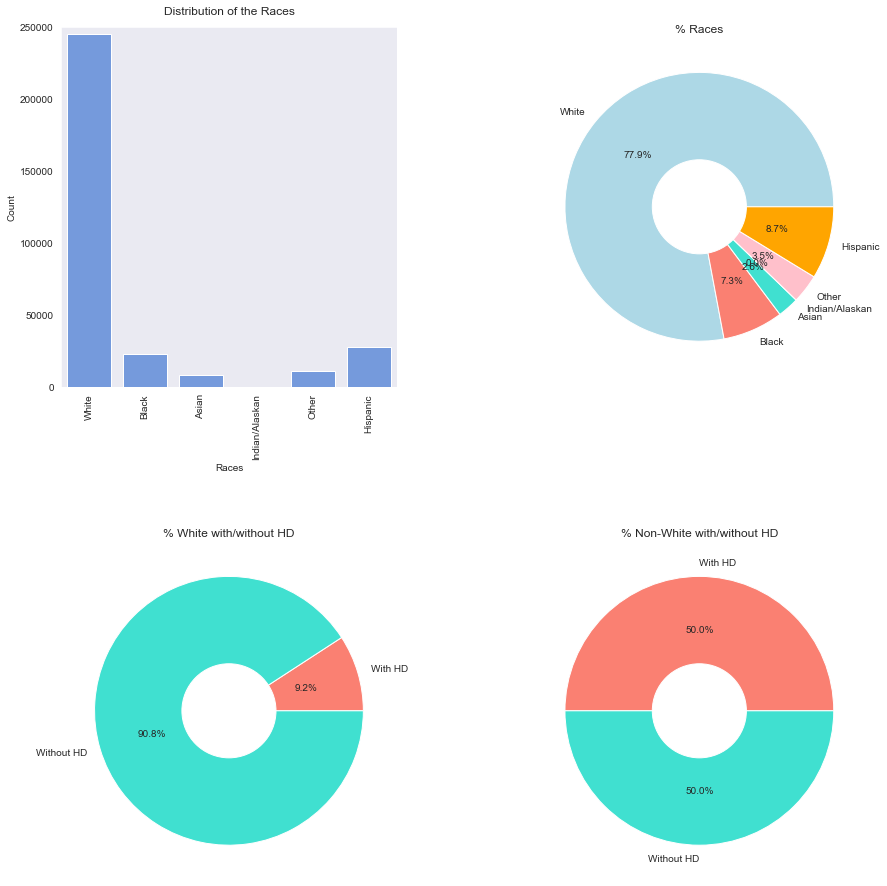

In [18]:
i_row, i_col = 2, 2
i_fig = plt.figure(figsize= (i_col *8, i_row *6))
i_gs = i_fig.add_gridspec(i_row, i_col)
i_ax = [[i_fig.add_subplot(i_gs[i, j]) for j in range(i_col)]
        for i in range(i_row)]

i_uniq_vals = list(data_df["Race"].unique())
i_labels = i_uniq_vals
i_labels[3] = "Indian/Alaskan"
i_colors = ["lightblue", "salmon", "turquoise", "yellow", "pink", "orange"]

# Distribution of the Races within the Population
bar_i00_data = [list(data_df["Race"]).count(x) for x in i_uniq_vals]
bar_i00_labs = i_uniq_vals
iax_00 = sns.barplot(x= i_uniq_vals, y= bar_i00_data, color= "cornflowerblue", ax= i_ax[0][0])
iax_00.set_title("Distribution of the Races", pad= 12)
iax_00.set(xlabel= "Races", ylabel= "Count", ylim= (0, 250000))
iax_00.set_xticklabels(i_labels, rotation= "vertical")

# Donut Chart of the Races
don_i01_data = bar_i00_data
iax_01 = i_ax[0][1]
iax_01.pie(don_i01_data, labels= i_labels, autopct= "%1.1f%%", colors= i_colors)
iax_01.set_title("% Races")
ciri_01 = plt.Circle((0, 0), 0.35, fc= "white")
iax_01.add_patch(ciri_01)

# Donut Chart of White with HD
don_i10_data = [len(data_df[(data_df["HeartDisease"] == "Yes")
                             & (data_df["Race"] == "White")]),
                len(data_df[(data_df["HeartDisease"] == "No")
                             & (data_df["Race"] == "White")])]
iax_10 = i_ax[1][0]
iax_10.pie(don_i10_data,
           labels= ["With HD", "Without HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
iax_10.set_title("% White with/without HD")
ciri_10 = plt.Circle((0, 0), 0.35, fc= "white")
iax_10.add_patch(ciri_10)

# Donut Chart of Non-White with HD
don_i11_data = [len(data_df[(data_df["HeartDisease"] == "Yes")
                             & (data_df["Race"] != "White")]),
                len(data_df[(data_df["HeartDisease"] == "Yes")
                             & (data_df["Race"] != "White")])]
iax_11 = i_ax[1][1]
iax_11.pie(don_i11_data,
           labels= ["With HD", "Without HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
iax_11.set_title("% Non-White with/without HD")
ciri_11 = plt.Circle((0, 0), 0.35, fc= "white")
iax_11.add_patch(ciri_11)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=1.1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## J) Diabetic Conditions and Heart Disease Analysis

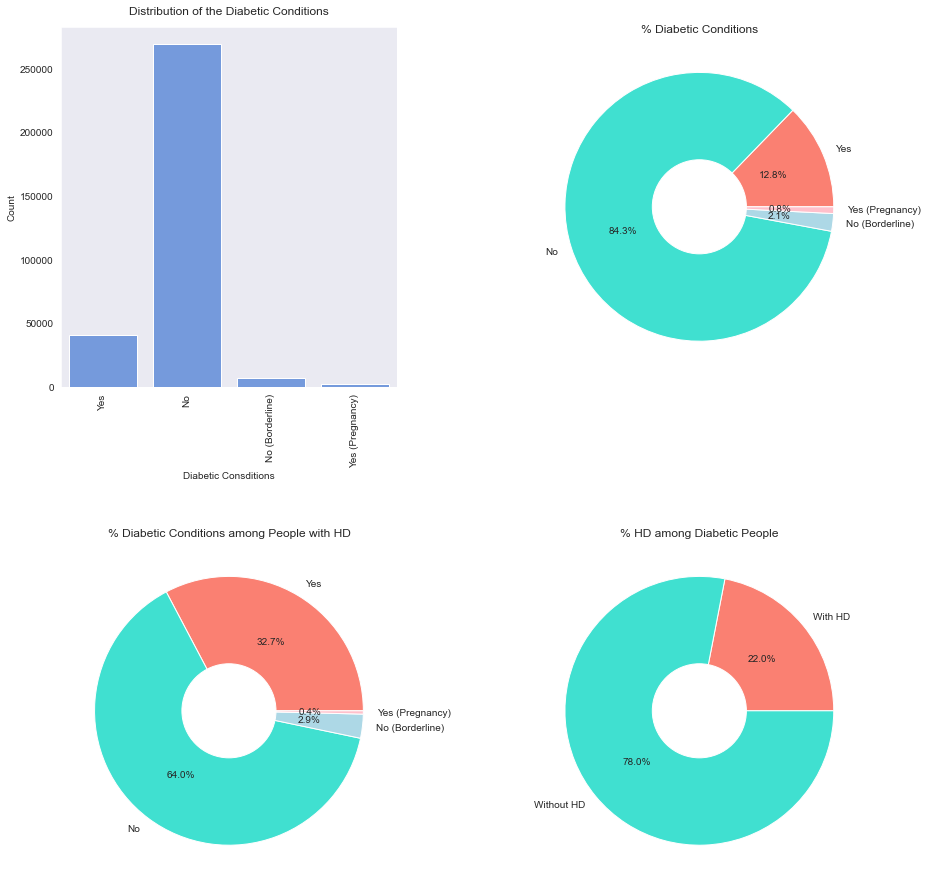

In [19]:
j_row, j_col = 2, 2
j_fig = plt.figure(figsize= (j_col *8, j_row *6))
j_gs = j_fig.add_gridspec(j_row, j_col)
j_ax = [[j_fig.add_subplot(j_gs[i, j]) for j in range(j_col)]
        for i in range(j_row)]

j_labels = ["Yes", "No", "No (Borderline)", "Yes (Pregnancy)"]

# Distribution of the Diabetic Conditions
bar_j00_data = [len(data_df[(data_df["Diabetic"] == cond)])
                for cond in data_df["Diabetic"].unique()]
jax_00 = sns.barplot(x= data_df["Diabetic"].unique(), y= bar_j00_data,
                     color= "cornflowerblue", ax= j_ax[0][0])
jax_00.set_title("Distribution of the Diabetic Conditions", pad= 12)
jax_00.set(xlabel= "Diabetic Consditions", ylabel= "Count")
jax_00.set_xticklabels(j_labels, rotation= "vertical")

# Donut Chart of the Diabetic Conditions within the Population
don_j01_data = bar_j00_data
jax_01 = j_ax[0][1]
jax_01.pie(don_j01_data,
           labels= j_labels,
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise", "lightblue", "pink"])
jax_01.set_title("% Diabetic Conditions")
cirj_01 = plt.Circle((0, 0), 0.35, fc= "white")
jax_01.add_patch(cirj_01)

# Donut Chart of Diabetic Conditions among People with HD
don_10_data = [len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Diabetic"] == cond)])
                for cond in data_df["Diabetic"].unique()]
jax_10 = j_ax[1][0]
jax_10.pie(don_10_data,
           labels= j_labels,
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise", "lightblue", "pink"])
jax_10.set_title("% Diabetic Conditions among People with HD")
cirj_10 = plt.Circle((0, 0), 0.35, fc= "white")
jax_10.add_patch(cirj_10)

# Donut Chart of HD among People with Diabetic
don_11_data = [len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Diabetic"] == "Yes")]),
               len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Diabetic"] == "Yes")])]
jax_11 = j_ax[1][1]
jax_11.pie(don_11_data,
           labels= ["With HD", "Without HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
jax_11.set_title("% HD among Diabetic People")
cirj_11 = plt.Circle((0, 0), 0.35, fc= "white")
jax_11.add_patch(cirj_11)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=1.1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## K) Physical Activity and Heart Disease Analysis

In [20]:
train_mod_df = data_df.copy()
dummy_list = []
for val in train_mod_df["PhysicalActivity"]:
    dummy_list.append("Yes") if val == "No" else dummy_list.append("No")
train_mod_df["LackPhysAct"] = dummy_list

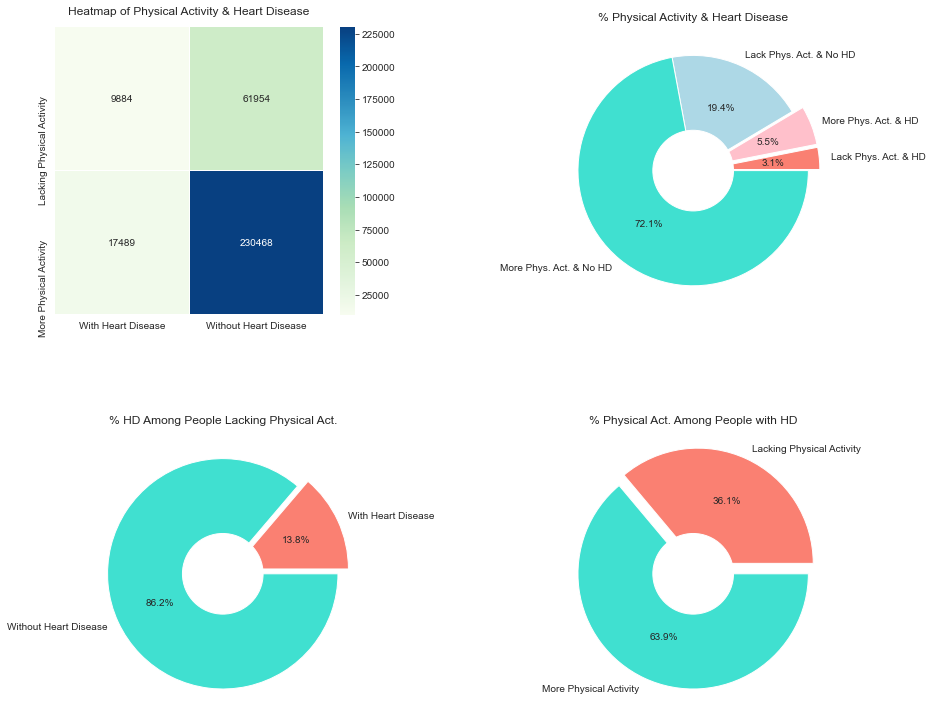

In [21]:
observ_k = VizData(train_mod_df, "HeartDisease", "With Heart Disease", "Without Heart Disease")
observ_k.binviz("LackPhysAct",
              ["Lacking Physical Activity", "More Physical Activity"],
              "Heatmap of Physical Activity & Heart Disease",
              ["Lack Phys. Act. & HD", "More Phys. Act. & HD",
               "Lack Phys. Act. & No HD", "More Phys. Act. & No HD"],
              don_all_title= "% Physical Activity & Heart Disease",
              don_one_title= "% HD Among People Lacking Physical Act.",
              don_two_title= "% Physical Act. Among People with HD")

## L) General Health and Heart Disease

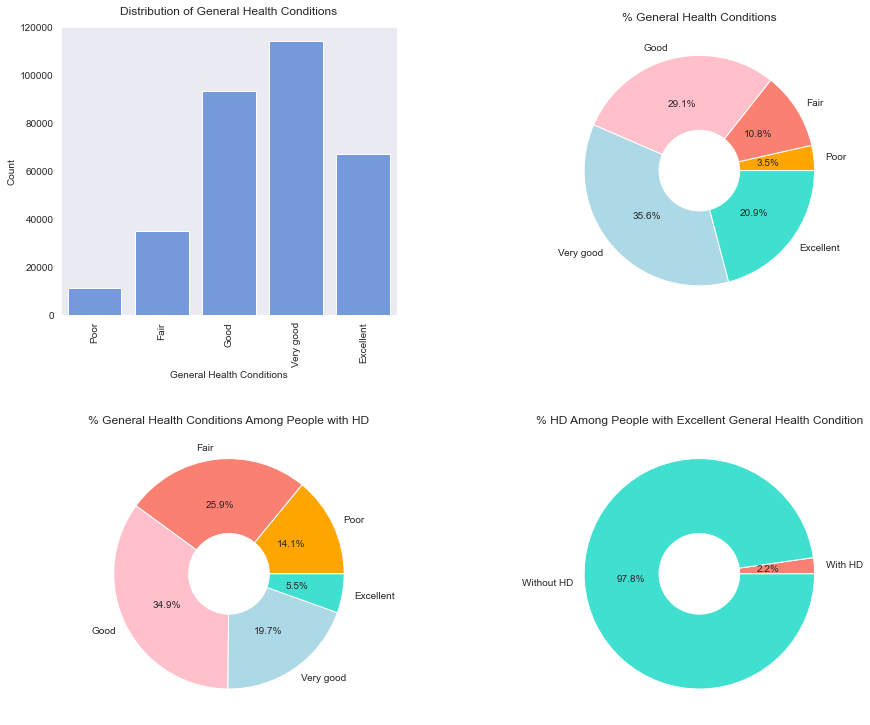

In [22]:
l_row, l_col = 2, 2
l_fig = plt.figure(figsize= (l_col *8, l_row *6))
l_gs = l_fig.add_gridspec(l_row, l_col)
l_ax = [[l_fig.add_subplot(l_gs[i, j]) for j in range(l_col)]
        for i in range(l_row)]

l_uniq = ["Poor", "Fair", "Good", "Very good", "Excellent"]
l_colors = ["orange", "salmon", "pink", "lightblue", "turquoise"]

# Distribution of the General Health Conditions Among the Population
bar_l00_data = [len(data_df[(data_df["GenHealth"] == x)]) for x in l_uniq]
lax_00 = sns.barplot(x= l_uniq, y= bar_l00_data, color= "cornflowerblue", ax= l_ax[0][0])
lax_00.set_title("Distribution of General Health Conditions", pad= 12)
lax_00.set(xlabel= "General Health Conditions", ylabel= "Count", ylim= (0, 120000))
lax_00.set_xticklabels(l_uniq, rotation= "vertical")

# Donut Chart of the General Health Conditions Among the Population
don_l00_data = bar_l00_data
lax_01 = l_ax[0][1]
lax_01.pie(don_l00_data,
           labels= l_uniq,
           autopct= "%1.1f%%",
           colors= l_colors)
lax_01.set_title("% General Health Conditions")
cirl_01 = plt.Circle((0, 0), 0.35, fc= "white")
lax_01.add_patch(cirl_01)

# Donut Chart of General Health Conditions Among People with HD
don_10_data = [len(data_df[(data_df["HeartDisease"] == "Yes")
                            & (data_df["GenHealth"] == x)]) for x in l_uniq]
lax_10 = l_ax[1][0]
lax_10.pie(don_10_data, labels= l_uniq, autopct= "%1.1f%%", colors= l_colors)
lax_10.set_title("% General Health Conditions Among People with HD")
cirl_10 = plt.Circle((0, 0), 0.35, fc= "white")
lax_10.add_patch(cirl_10)

# Donut Chart of HD Among People with Non-Excellent General Health Conditions
don_11_data = [len(data_df[(data_df["HeartDisease"] == "Yes")
                            & (data_df["GenHealth"] == "Excellent")]),
               len(data_df[(data_df["HeartDisease"] == "No")
                            & (data_df["GenHealth"] == "Excellent")])]
lax_11 = l_ax[1][1]
lax_11.pie(don_11_data,
           labels= ["With HD", "Without HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
lax_11.set_title("% HD Among People with Excellent General Health Condition")
cirl_11 = plt.Circle((0, 0), 0.35, fc= "white")
lax_11.add_patch(cirl_11)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## M) Sleep Time and Heart Disease Analysis

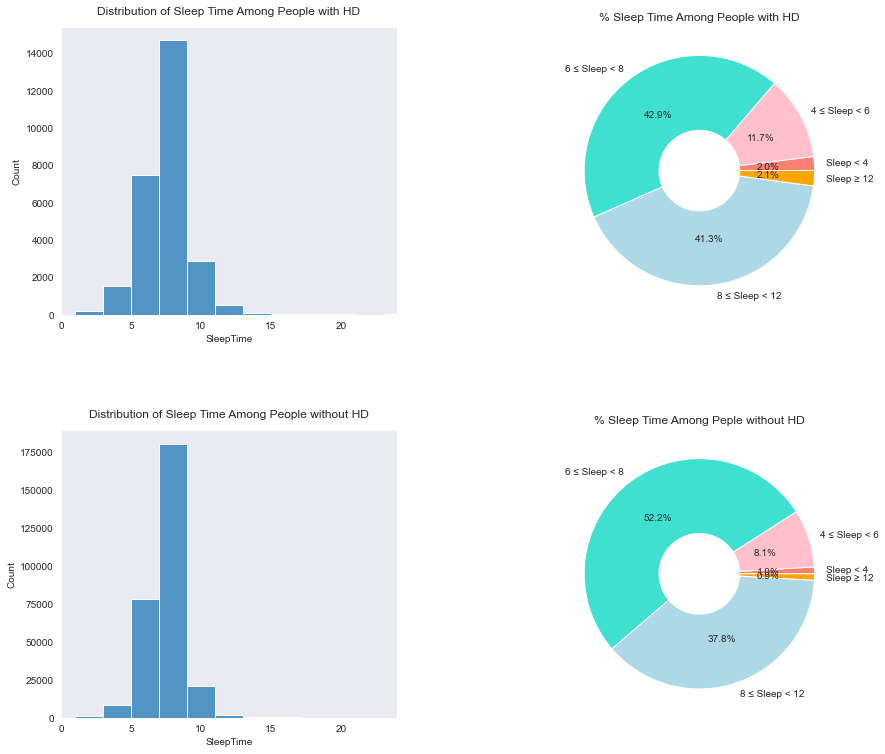

In [23]:
m_labs = ["Sleep < 4", "4 ≤ Sleep < 6", "6 ≤ Sleep < 8", "8 ≤ Sleep < 12", "Sleep ≥ 12"]
m_div = [4, 6, 8, 12]
m_colors = ["salmon", "pink", "turquoise", "lightblue", "orange"]
observ.numviz("SleepTime", m_labs, m_labs,
              m_div, m_div,
              m_colors, m_colors,
              (0, 24), (0, 24),
              hist_binwidth= 2,
              h1_tit= "Distribution of Sleep Time Among People with HD",
              h2_tit= "Distribution of Sleep Time Among People without HD",
              d1_tit= "% Sleep Time Among People with HD",
              d2_tit= "% Sleep Time Among Peple without HD")

## N) Asthma and Heart Disease Analysis

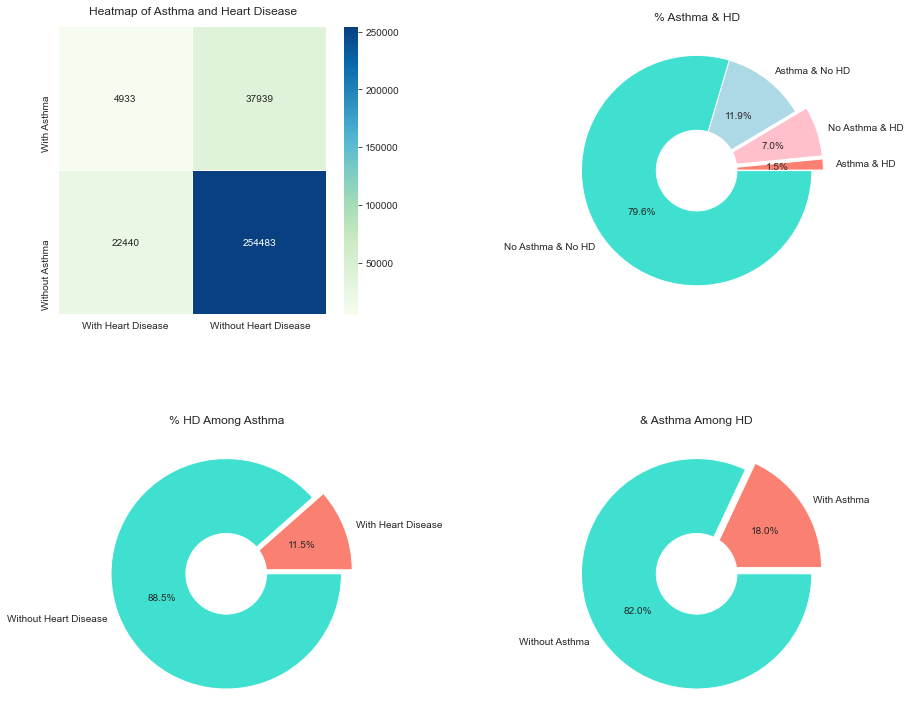

In [24]:
observ.binviz("Asthma", ["With Asthma", "Without Asthma"],
              "Heatmap of Asthma and Heart Disease",
              ["Asthma & HD", "No Asthma & HD", "Asthma & No HD", "No Asthma & No HD"],
              don_all_title= "% Asthma & HD",
              don_one_title= "% HD Among Asthma",
              don_two_title= "& Asthma Among HD")

## O) Kidney Disease and Heart Disease Analysis

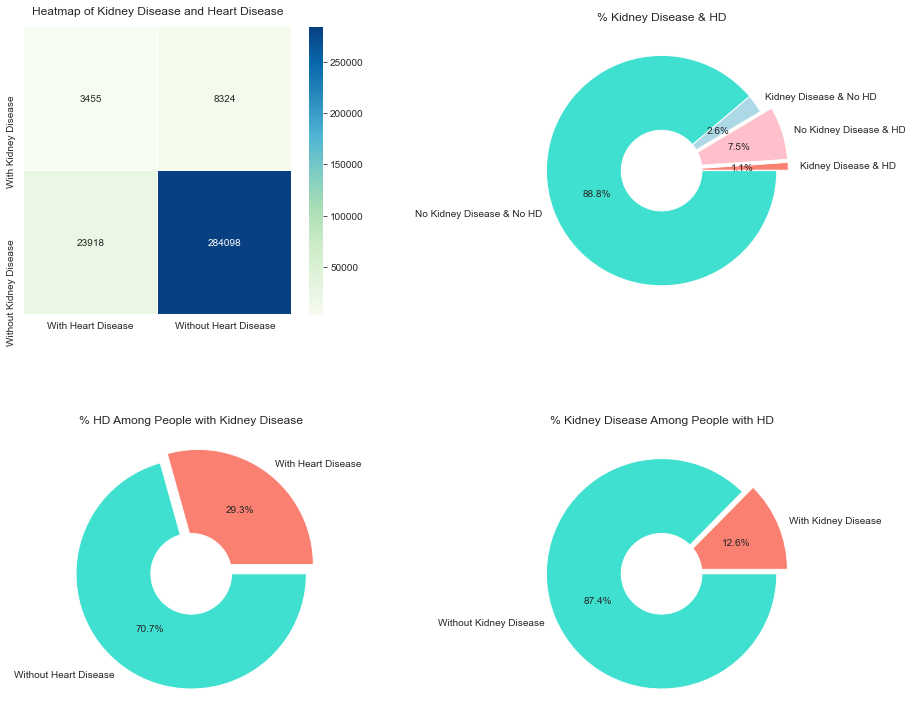

In [25]:
observ.binviz("KidneyDisease",
              ["With Kidney Disease", "Without Kidney Disease"],
              "Heatmap of Kidney Disease and Heart Disease",
              ["Kidney Disease & HD",
               "No Kidney Disease & HD",
               "Kidney Disease & No HD",
               "No Kidney Disease & No HD"],
              don_all_title= "% Kidney Disease & HD",
              don_one_title= "% HD Among People with Kidney Disease",
              don_two_title= "% Kidney Disease Among People with HD")

## P) Skin Cancer and Heart Disease Analysis

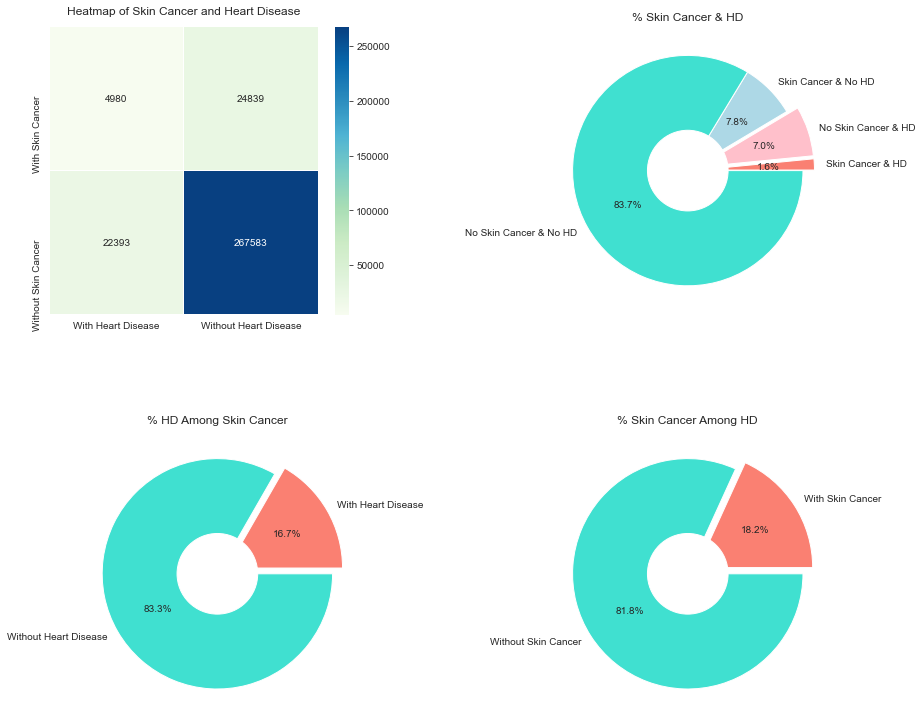

In [26]:
observ.binviz("SkinCancer", ["With Skin Cancer", "Without Skin Cancer"],
              "Heatmap of Skin Cancer and Heart Disease",
              ["Skin Cancer & HD",
               "No Skin Cancer & HD",
               "Skin Cancer & No HD",
               "No Skin Cancer & No HD"],
              don_all_title= "% Skin Cancer & HD",
              don_one_title= "% HD Among Skin Cancer",
              don_two_title= "% Skin Cancer Among HD")

## Q) Pearson Correlation

Now we will observe the correlation between features
in the data set. "Correlation" can be intuitively thought of as
the degree to which a pair of variables are linearly related.
Let us observe the following description to get to know
about "correlation" in a formal mathematical manner.

Mathematically, we can think of each feature as a
random variable $X : \Omega \to \mathbb{R}$, where
$\Omega$ is the set of all data points in the data set.
And let $(\Omega,\, \mathcal{F},\, P)$ be the probability space
[1] corresponding to the data set. Also, suppose
$\mathcal{R}(\Omega,\, \mathcal{F},\, P)$ is the space of all
real random variables on $\Omega$.
**Covariance** [2] is a map
$$
\mathrm{cov}: \mathcal{R}(\Omega,\, \mathcal{F},\, P)
     \times \mathcal{R}(\Omega,\, \mathcal{F},\, P)
     \to \mathbb{R}
$$
defined by
$$
\forall X, Y \in \mathcal{R}(\Omega,\, \mathcal{F},\, P) \,,\;
\mathrm{cov}(X, Y) := E[ (X - E[X]) \, (Y - E[Y]) ] \,,
$$
where $E: \mathcal{R}(\Omega,\, \mathcal{F},\, P) \to \mathbb{R}$
is expected value. By expanding the definition of covarinace above,
we obtain

$$
\begin{split}
\mathrm{cov}(X, Y)
&= E[ (X - E[X]) \, (Y - E[Y]) ] \\
&= E[ XY - X E[Y] - Y E[X] + E[X] E[Y] ] \\
&= E[XY] - E[X] E[Y] - E[Y] E[X] + E[X] E[Y] \\
&= E[XY] - E[X] E[Y] \,,
\end{split}
$$

for every $X, Y \in \mathcal{R}(\Omega,\, \mathcal{F},\, P)$.
And the **Pearson correlation** [3] is a map
$$
\mathrm{corr}: \mathcal{R}(\Omega,\, \mathcal{F},\, P)
               \times \mathcal{R}(\Omega,\, \mathcal{F},\, P)
               \to \mathbb{R}
$$
that is defined by
$$
\forall X, Y \in \mathcal{R} \,,\;
\mathrm{corr}(X, Y) := \frac{\mathrm{cov}(X, Y)}{
                             \sqrt{ \mathrm{cov}(X, X) \, \mathrm{cov}(Y, Y)}} \,.
$$
And by expanding covariance on the definition of correlation above,
we also have

$$
\begin{split}
\mathrm{corr}(X, Y)
&= \frac{\mathrm{cov}(X, Y)}{\sqrt{ \mathrm{cov}(X, X) \, \mathrm{cov}(Y, Y)}} \\
&= \frac{E[XY] - E[X] E[Y]}{\sqrt{ (E[X^2] - E[X]^2) \, (E[Y^2] - E[Y]^2) }} \\
&= \frac{E[XY] - E[X] E[Y]}{
    E[X^2]E[Y^2] - E[X^2]E[Y]^2 - E[X]^2E[Y^2] + E[X]^2E[Y]^2}
\end{split}
$$

In this project, we will make use of correlation function
provided by Pandas Data Frame which can be commanded using `pandas.DataFrame.corr`.
By default, the `corr` method in Pandas uses Pearson correlation.


**References**

[1] Kolmogorov, A. N. (1950). "Foundations of the Probability Theory". New York: Chelsea.

[2] Park,Kun Il (2018). Fundamentals of Probability and Stochastic Processes with Applications to Communications. Springer.

[3] Rodgers, J. L.; Nicewander, W. A. (1988). "Thirteen ways to look at the correlation coefficient".
The American Statistician.

In order to be able to apply `corr` method to the dataset,
we need to transform the non-numeric features into numeric ones.

In [27]:
# Feature Numeric Transformation:
trans_df = data_df.copy()

# 1. Features with "Yes"/"No" values
bin_val_cols = [col for col in data_df.columns
                if set(data_df[col]) == {"Yes", "No"}]
for col in bin_val_cols:
    num_val = []
    for val in data_df[col]:
        num_val.append(1) if val == "Yes" else num_val.append(0)
    trans_df[col] = num_val
    
# 2. Column "Sex"
# For "sex" column, we will label "Female" as 0 and "Male" as 1.
new_sex_vals = []
for fm in trans_df["Sex"]:
    new_sex_vals.append(0) if fm == "Female" else new_sex_vals.append(1)
trans_df["Sex"] = new_sex_vals

# 3. Multivalue Non-Ordered Features
def multi_non_ord(df, cols, add_names):
    for col, name in zip(cols, add_names):
        new_subcols_for_cols = sorted(list(df[col].unique()))
        for nsc in new_subcols_for_cols:
            nsc_vals = []
            for val in df[col]:
                nsc_vals.append(1) if val == nsc else nsc_vals.append(0)
            df[str(name) + str(nsc)] = nsc_vals
        df.drop(columns= [col], inplace= True)

multi_non_ord(trans_df, ["AgeCategory", "Race"], ["Age: ", "Race: "])

# 4. Column "Diabetic"
diab_new_cols = ["GenDiabetic", "Borderline Diabetic", "Pregnancy Diabetic"]
diab_params = ["Yes", "No, borderline diabetes", "Yes (during pregnancy)"]
for dnc, dp in zip(diab_new_cols, diab_params):
    diab_new_vals = []
    for val in trans_df["Diabetic"]:
        diab_new_vals.append(1) if val == dp else diab_new_vals.append(0)
    trans_df[dnc] = diab_new_vals
trans_df.drop(columns= ["Diabetic"], inplace= True)

# 5. Column "General Health Conditions"
gh_values = ["Poor", "Fair", "Good", "Very good", "Excellent"] # taken from the data
num_gh = list(range(1, len(gh_values) + 1))
gh_new_vals = []
for gh in trans_df["GenHealth"]:
    for ghv, ghvn in zip(gh_values, num_gh):
        if gh == ghv:
            gh_new_vals.append(ghvn)
trans_df["GenHealth"] = gh_new_vals

In [28]:
# The shape of the transformed data
print(f"The transformed data consists of {trans_df.shape[0]} rows and {trans_df.shape[1]} columns.")

# Descriptive statistics
trans_df.describe().T

The transformed data consists of 319795 rows and 37 columns.


,count,mean,std,min,25%,50%,75%,max
HeartDisease,319795.0,0.085595,0.279766,0.00,0.00,0.00,0.00,1.00
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
Smoking,319795.0,0.412477,0.492281,0.00,0.00,0.00,1.00,1.00
AlcoholDrinking,319795.0,0.068097,0.251912,0.00,0.00,0.00,0.00,1.00
Stroke,319795.0,0.037740,0.190567,0.00,0.00,0.00,0.00,1.00
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
DiffWalking,319795.0,0.138870,0.345812,0.00,0.00,0.00,0.00,1.00
Sex,319795.0,0.475273,0.499389,0.00,0.00,0.00,1.00,1.00
PhysicalActivity,319795.0,0.775362,0.417344,0.00,1.00,1.00,1.00,1.00


Then the Pearson correlation between features is presented on the following heatmap.

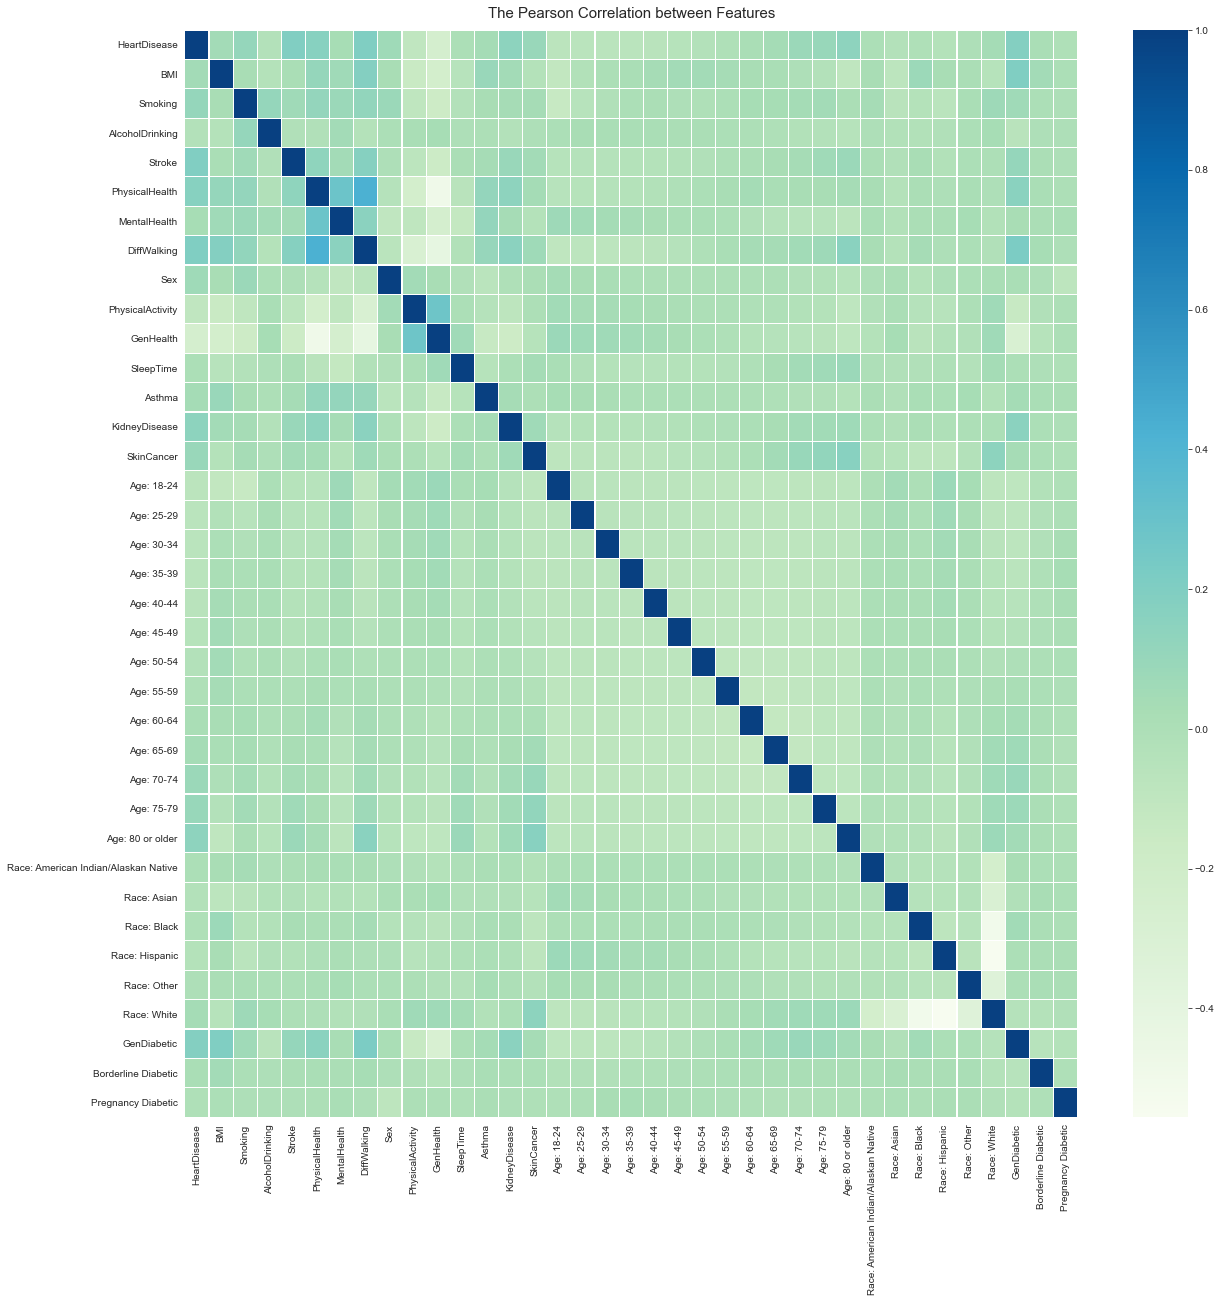

In [29]:
# Pearson Correlation between Features
data_corr = trans_df.corr()

corr_ft = plt.figure(figsize= (20, 20))
corr_ft = sns.heatmap(data_corr, linewidth= 0.1, cmap= "GnBu")
corr_ft.set_title("The Pearson Correlation between Features",
                   fontsize= 15,
                   pad= 12)

plt.show()

The Pearson correlation between each feature and `HeartDisease`
is given on the following chart.

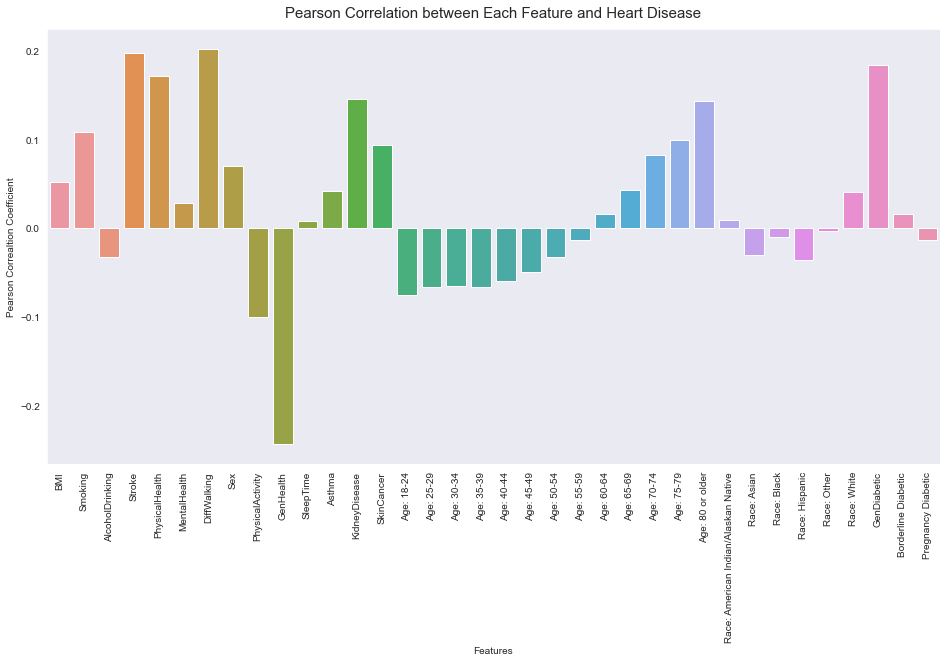

In [30]:
# Pearson Correlation between each feature and HeartDisease
corr_ft_hd_x = list(data_corr.columns)
del corr_ft_hd_x[0]
corr_ft_hd_y = list(data_corr["HeartDisease"])
del corr_ft_hd_y[0]

corr_ft_hd = plt.figure(figsize= (16, 8))
corr_ft_hd = sns.barplot(x= corr_ft_hd_x, y= corr_ft_hd_y)
corr_ft_hd.set_title("Pearson Correlation between Each Feature and Heart Disease",
                     fontsize= 15, pad= 12)
corr_ft_hd.set(xlabel= "Features", ylabel= "Pearson Correaltion Coefficient")
corr_ft_hd.set_xticklabels(corr_ft_hd_x, rotation= "vertical")

plt.show()

# Interpretation and Conclusion

From the analysis we can infer the following conclusion:
<li>BMI contributes to heart disease.
    People with BMI not in between 20 and 25 tend to have heart disease.
<li>Smoking habits contributes to heart disease. On the other hand,
    the data shows that alcoholic drinking habits does not contribute to heart disease,
    which is quite counter-intuitive.
<li>Stroke contributes to heart disease.
<li>The number of physical health problems experienced within
    the past 30 days contributes to heart disease. On the other hand, the data
    shows that the number of mental health problems within the same interval only
    gives a small contribution to heart disease.
<li>People with difficulty walking tend to have heart disease.
<li>In terms of sex, males tend to have heart disease than females.
<li>The number of physical activity than working in the past 30 days decreases
    the chance of getting heart disease. The same conclusion apply for the general
    health conditions.
<li>The amount of sleep time in a day does not seem to give
    a considerable contribution to heart disease.
    However, people without heart disease commonly have a better sleep time,
    that is in between 6 to 8 hours in a day.
<li>Asthma, kidney disease, skin cancer and diabetes contribute to heart disease. However,
    asthma only gives a small contribution.
<li>People older than 60 tend to have heart disease than those younger than 60.
<li>Race does not seem to have constributions to heart disease.
    People of any race could have heart disease.